In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

# Import dataset
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t')
dataset


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Reads data from a TSV file and loads it into a dataframe.

In [ ]:
print(dataset.columns)

Index(['Review', 'Liked'], dtype='object')


In [ ]:
import re  # Library for regular expressions
import nltk  # Natural Language Toolkit (NLP library)
nltk.download('stopwords')
from nltk.corpus import stopwords  # Importing stopwords
from nltk.stem.porter import PorterStemmer  # Importing stemming algorithm
corpus = []
# Assuming 'Review' column might have leading/trailing spaces or different capitalization
review_column = next((col for col in dataset.columns if col.strip().lower() == 'review'), None)
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  # Removing punctuation
  review = review.lower()  # Converting to lowercase
  review = review.split()  # Splitting into individual words
  ps = PorterStemmer()  # Creating
  review = [ps.stem(word) for word in review
          if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)









[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This block of code **cleans**,**standardizes**and **preprocessed the text reviews** from the dataset by:


*   Removing noise(punctuation,numbers)
*   Converting to lowercase
*   Removing stopwords
*   Applying stemming
*   Storing the clean text in corpus for later use in  
    feature extraction







In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


This part of the code:


*   converts preprocessed text reviews into a numerical format using Bag of words technique.
*   Each word become a feature, and each review is represented as a vector of word counts.
*   It represents the data so it can be fed into a machine learning model for training and prediction.






In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=123)



This code splits the dataset into training and testing parts
so that the model can:


*   Learn patterns from training data.
*   Be evaluated on unseen test data to check how well it generalizes.

The random_state ensures consistency across multiple runs.





In [ ]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy',random_state=123)

model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=501, random_state=123)


*   Here we are using Random Forest to train a model that can classify restaurant reviews as positive or negative.
*   It builds 501 decision trees, each making its own prediction, and final prediction is made by majority voting.
*   Using entropy as the splitting rule helps the moodel decide the best way to divide the data at each step.





In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1])

*   We are using the model we trained om the training set to make predictions on new,unseen data(test set).
*   This step helps evaluate how well our model generalizes and performs in real-world-like scenarios.



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.72


*   This part of the code tells how well our model performed in terms of overall correctness.
*   A higher accuracy means our model is better at classifying reviews correctly.
*   Here accuracy is 0.72 it means the model correctly predicted 72% of the reviews in the test set.






In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[99 25]
 [45 81]]


The confusion matrix provides a detailed view of our model's performance, breaking it down into correct and incorrect predictions for each class.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       124
           1       0.76      0.64      0.70       126

    accuracy                           0.72       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.73      0.72      0.72       250



This report helps to understand:


*   How well the model performs on each class.
*   Whether it is biased towards any class(if precision/recall is very different).
*   The balance beyween precision and recall using F1-score.
*   Helps in model selection and tuning.





In [ ]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {auc_score:.2f}')


ROC-AUC Score: 0.72


Here the ROC-AUC score is 0.72 that means the model has an 72% chance of correctly distinguishing between a positive and a negative review. ROC-AUC score of 0.72 means it's very effective at telling apart negative from positive reviews.

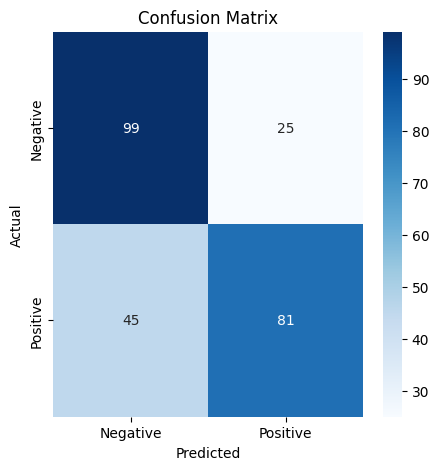

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The heatmap visually helps to:
*   Understand performance quickly.
*   Identify if the model is making more False Positives or False Negatives.
*   Check model balance(whether it's biased towards one class).

Here, the model is doing well as we're seeing dark-colored diagonal boxes(top-left),indicating many correct predictions.







Natural Language Processing (NLP) is essential for detecting and analyzing restaurant reviews because reviews are written in human language, not numbers. NLP helps convert these unstructured texts into a structured format that machines can understand. By using techniques like stopwords removal, stemming, and vectorization, we extract meaningful features that allow machine learning models to classify sentiments (positive or negative).

Without NLP, we would treat the review text as raw strings or arbitrary characters, which would lose all contextual and semantic meaning. This would make it impossible for a model to understand tone, sentiment, or relevant words — resulting in poor predictions. NLP bridges the gap between human language and machine understanding, making review analysis accurate, scalable, and efficient.